In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path="/content/Diabetes dataset.csv"
data=pd.read_csv(path)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['BMI']=le.fit_transform(data['BMI'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,123,0.627,50,1
1,1,85,66,29,0,62,0.351,31,0
2,8,183,64,0,0,30,0.672,32,1
3,1,89,66,23,94,77,0.167,21,0
4,0,137,40,35,168,209,2.288,33,1


In [ ]:
x=data[['BMI','Age','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']]
y=data['Outcome']
print(x,y)

     BMI  Age  Glucose  BloodPressure  SkinThickness  Insulin  \
0    123   50      148             72             35        0   
1     62   31       85             66             29        0   
2     30   32      183             64              0        0   
3     77   21       89             66             23       94   
4    209   33      137             40             35      168   
..   ...  ...      ...            ...            ...      ...   
763  118   63      101             76             48      180   
764  155   27      122             70             27        0   
765   58   30      121             72             23      112   
766   95   47      126             60              0        0   
767   98   23       93             70             31        0   

     DiabetesPedigreeFunction  
0                       0.627  
1                       0.351  
2                       0.672  
3                       0.167  
4                       2.288  
..                        .

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     BMI  Age  Glucose  BloodPressure  SkinThickness  Insulin  \
60     0   21       84              0              0        0   
618   78   50      112             82             24        0   
346   83   22      139             46             19       83   
294   18   65      161             50              0        0   
231  229   46      134             80             37      370   
..   ...  ...      ...            ...            ...      ...   
71    82   26      139             64             35      140   
106   22   27       96            122              0        0   
270  225   38      101             86             37        0   
435  204   29      141              0              0        0   
102   23   21      125             96              0        0   

     DiabetesPedigreeFunction  
60                      0.304  
618                     1.282  
346                     0.654  
294                     0.254  
231                     0.238  
..                        .

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[82, 17],
       [20, 35]])

Text(0.5, 427.9555555555555, 'Predicted label')

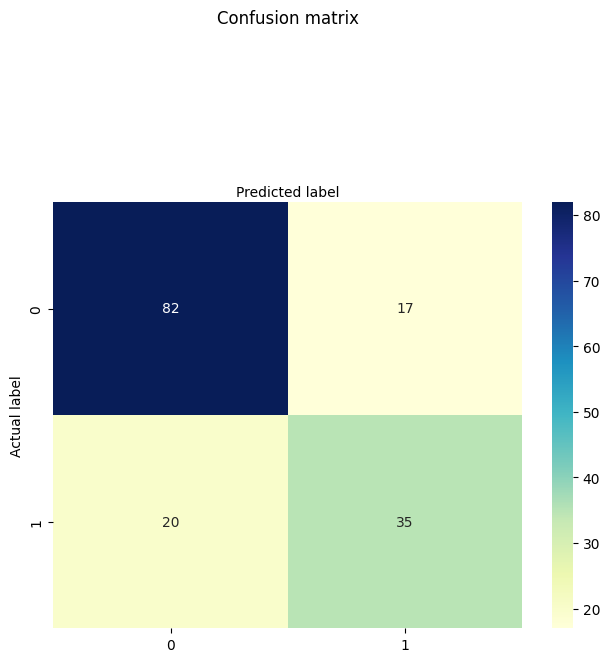

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.4)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Acccuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test,y_pred))

Acccuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364
F1 Score: 0.6542056074766355
